In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

property = 'fire_size'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.51; max value: 517078.0


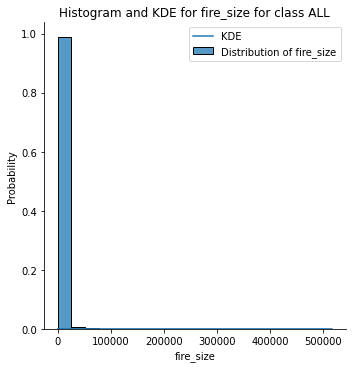

In [2]:
x = np.linspace(0, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 20)

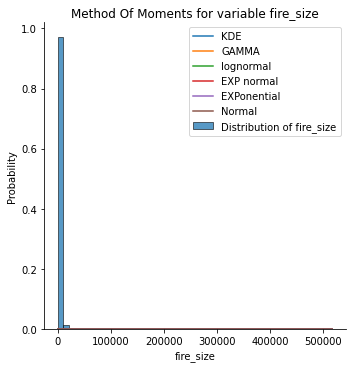

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=10.4175, pvalue=8.473133306097225e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.44, pvalue=9.909301386655972e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.7805999999999997, pvalue=0.008075448539883512)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.32, pvalue=0.011511738725894704), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.6062000000000012, pvalue=0.021534984759320253)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.28, pvalue=0.039194586195352224), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.6402000000000001, pvalue=0.017744732961526344)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5, 

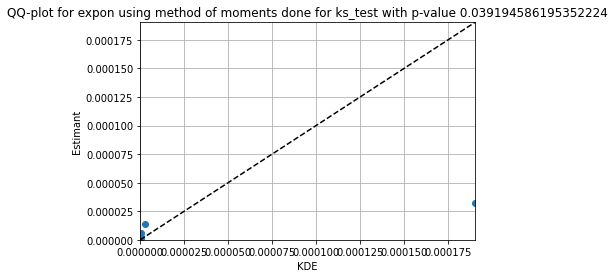

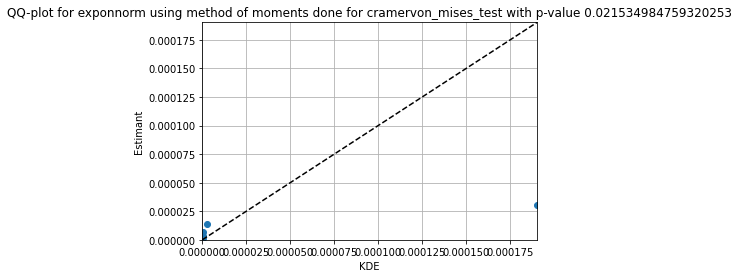

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

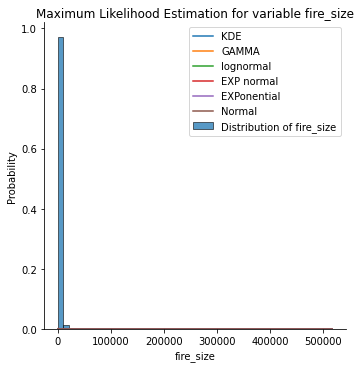

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=10.4175, pvalue=8.473133306097225e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.4, pvalue=0.0005822568814776493), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.1281999999999996, pvalue=0.0012144786913588224)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.6, pvalue=1.0624962385385807e-08), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.3002000000000002, pvalue=1.5270403386224984e-08)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.62, pvalue=2.623447502564397e-09), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.598600000000001, pvalue=3.361261047274411e-09)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic=0

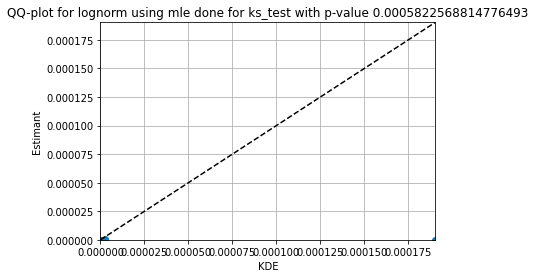

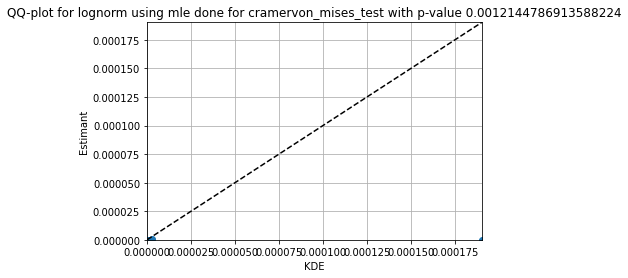

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

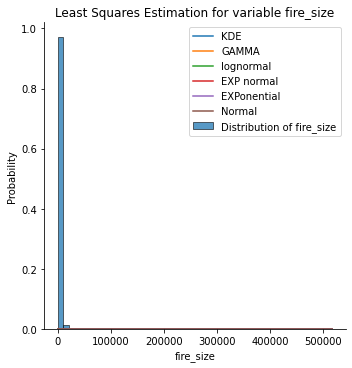

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.28, pvalue=0.039194586195352224), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5809999999999995, pvalue=0.024880287999458073)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.48, pvalue=1.3867885687360081e-05), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.3946000000000005, pvalue=0.0002933794451830396)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.3, pvalue=0.02170784069014051), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5394000000000005, pvalue=0.03163821304126557)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.62, pvalue=2.623447502564397e-09), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=3.598600000000001, pvalue=3.361261047274411e-09)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statis

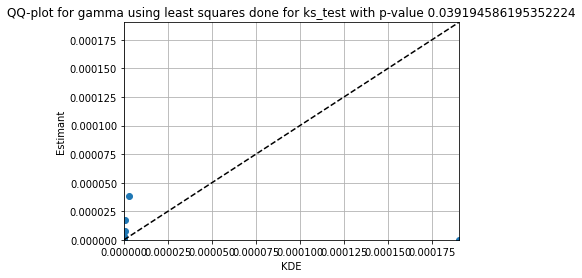

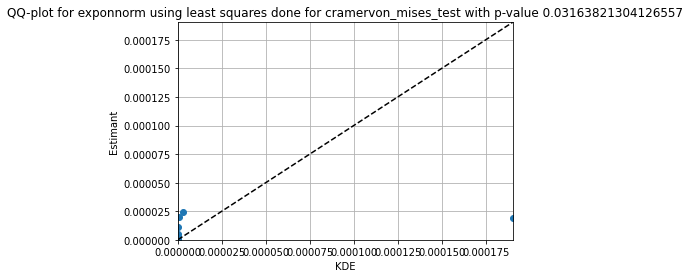

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

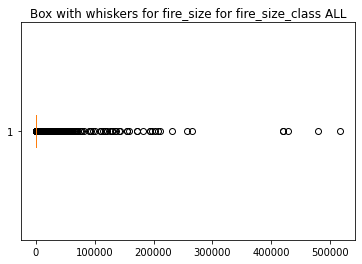

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()